In [1]:
import pandas as pd
import numpy as np
import sys
import os
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
import glob

2024-04-26-iHSC-AS-6th-Run raw reads: 1798421 rejected: 1327328


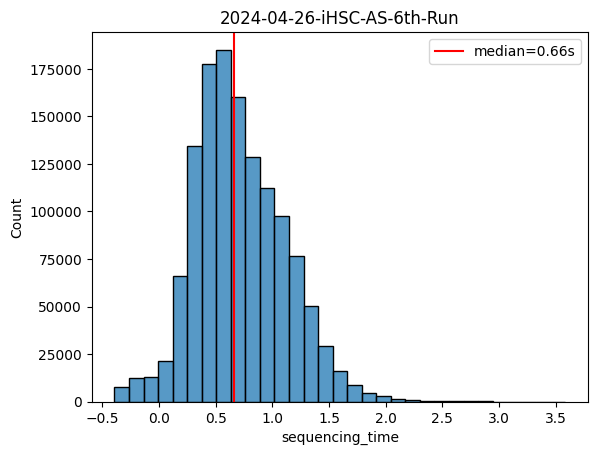

fifth_AS_test_03142024 raw reads: 310116 rejected: 54604


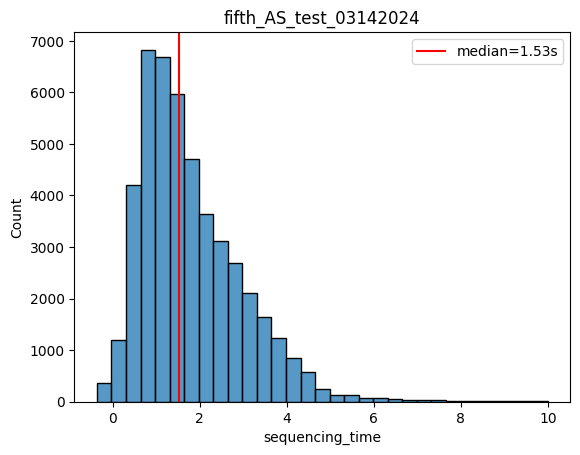

first_AS_test_03122024 raw reads: 313103 rejected: 46561


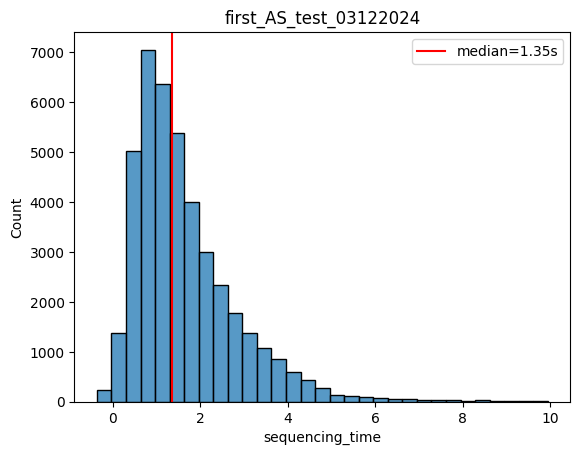

sixth_AS_test_03142024 raw reads: 315874 rejected: 57643


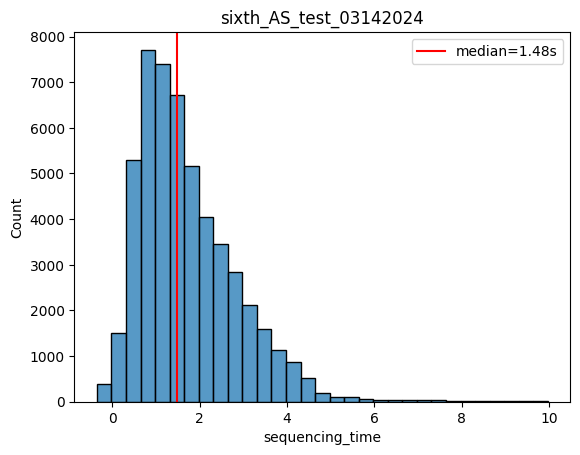

2024-04-26-iHSC-AS-7th-Run raw reads: 127113 rejected: 92057


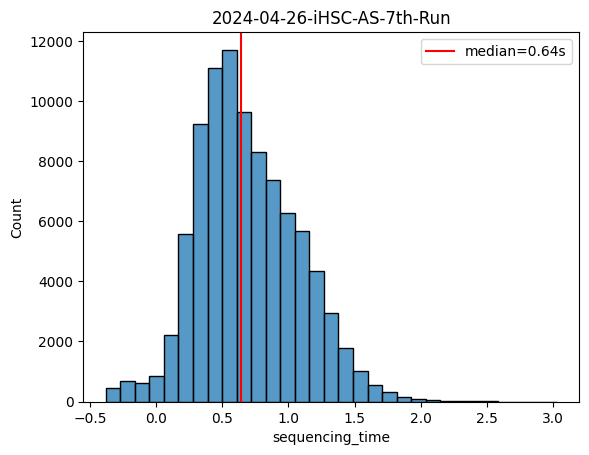

second_AS_test_03132024 raw reads: 356314 rejected: 65820


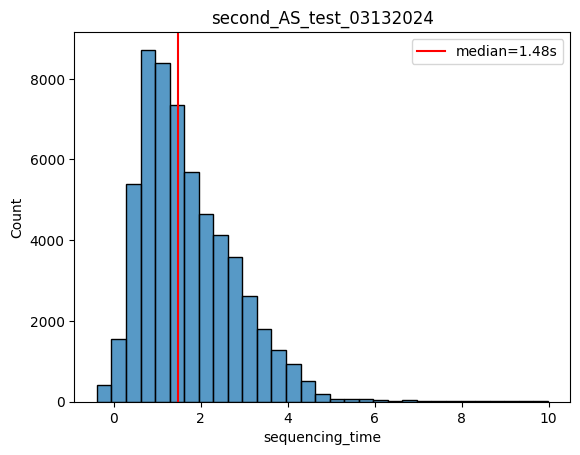

seventh_AS_03152024 raw reads: 3985838 rejected: 832880


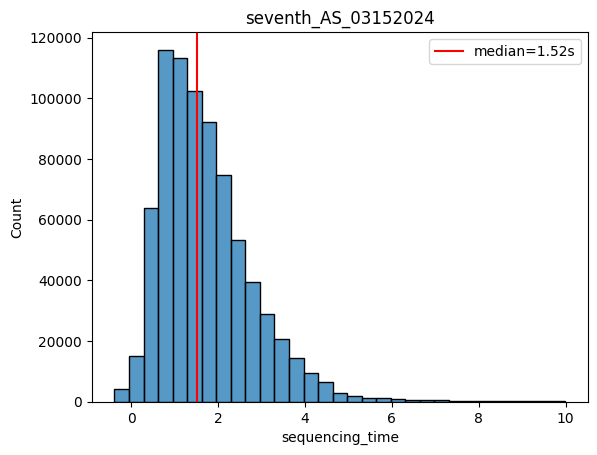

second_iHSC_AS_04162024 raw reads: 1225987 rejected: 534076


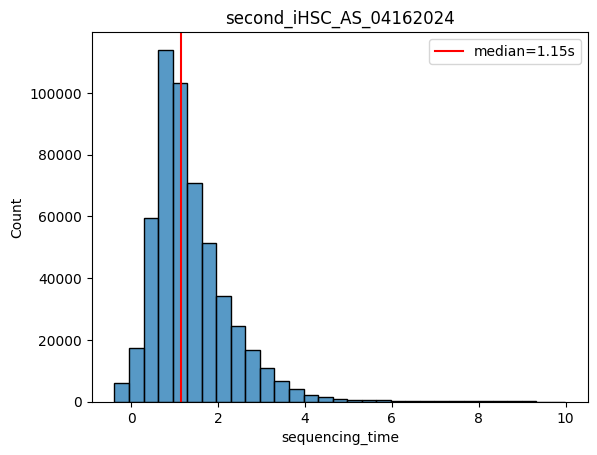

2024-04-26-iHSC-AS-8th-Run-fast raw reads: 860682 rejected: 640667


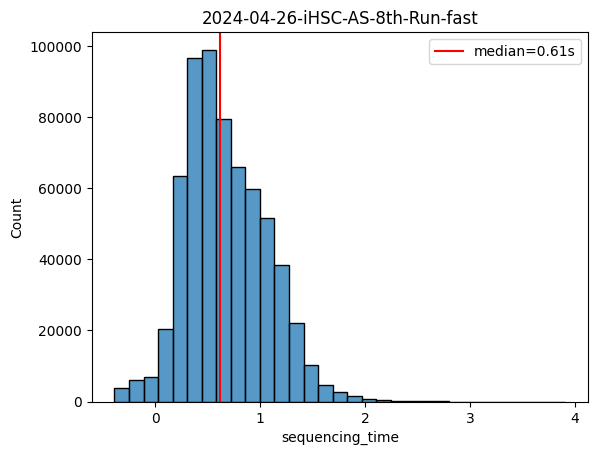

2024-04-22-iHSC-4th-run raw reads: 2062788 rejected: 1473403


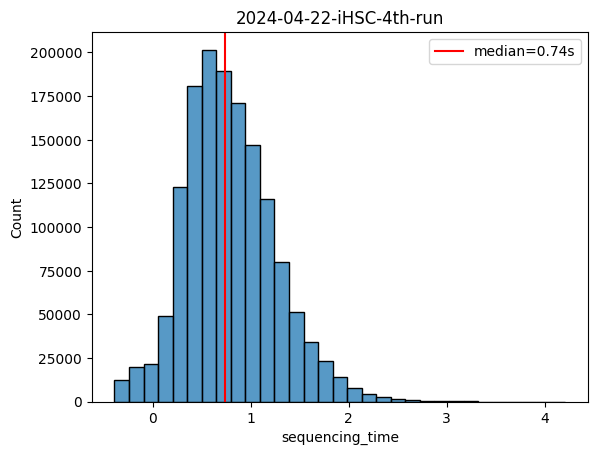

2024-05-03-iHSC-AS-9th-run raw reads: 1644778 rejected: 1189775


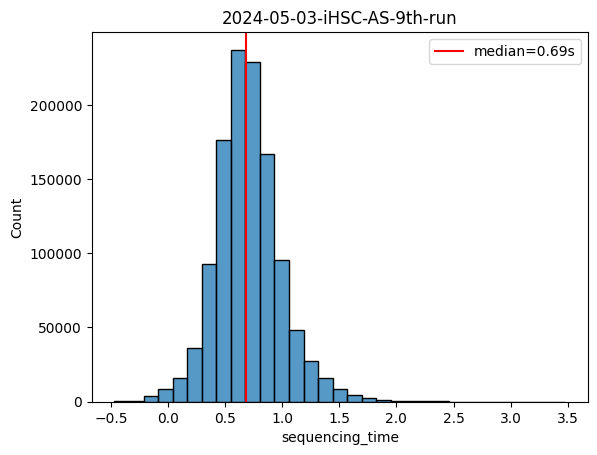

2024-04-18-iHSC-3rd-run raw reads: 1306415 rejected: 927229


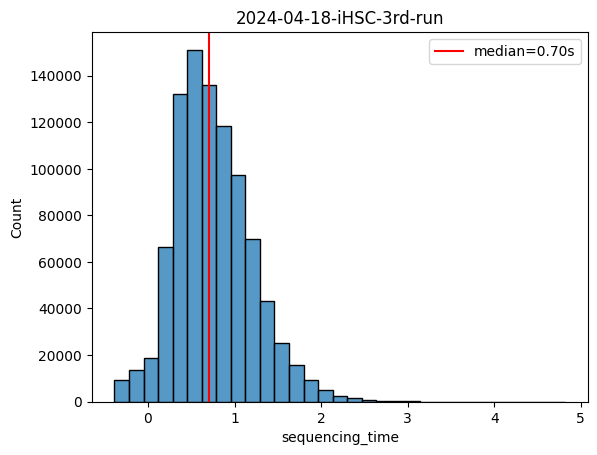

,run,sequencing_time
3816,2024-04-26-iHSC-AS-6th-Run,-0.27750
3820,2024-04-26-iHSC-AS-6th-Run,0.39625
3822,2024-04-26-iHSC-AS-6th-Run,0.70300
3825,2024-04-26-iHSC-AS-6th-Run,0.48525
3826,2024-04-26-iHSC-AS-6th-Run,0.49000


In [2]:
dpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/data/adaptive_sampling/experiment_data/"


sample = 10000
df = []
for test_run in os.listdir(dpath):
    # check if AS summary exists
    as_search = f"{dpath}{test_run}/other_reports/*adaptive_sampling*"
    as_paths = glob.glob(as_search)

    if not len(as_paths) > 0:
        continue

    asdf = pd.read_csv(as_paths[0])
    rejected_ids = asdf[asdf['decision'] == 'unblock']['read_id'].values     

    # load the sequencing summary
    summary_search = f"{dpath}{test_run}/*sequencing_summary*"
    summary_path = glob.glob(summary_search)[0]
    tmp = pd.read_csv(summary_path, sep='\t')
    print(f"{test_run} raw reads: {len(tmp)} rejected: {len(rejected_ids)}")
    tmp['run'] = test_run
    tmp = tmp[tmp['read_id'].isin(rejected_ids)]

    tmp['sequencing_time'] = tmp['duration'] - 1
    tmp['run'] = test_run
    df.append(tmp)
    
    median = np.median(tmp['sequencing_time'].values)

    sns.histplot(data=tmp[tmp['sequencing_time'] < 10], 
             x='sequencing_time',
             bins=31)

    plt.axvline(x=median, c='r', label=f"{median=:.2f}s")
    plt.legend()

    plt.title(f"{test_run}")
    plt.show()

df = pd.concat(df)
df = df[['run', 'sequencing_time']]
df.head()

In [3]:
df['Sequencer'] = np.where(df['run'].str.contains('iHSC'), 'GridION', 'P2')
df.head()

,run,sequencing_time,Sequencer
3816,2024-04-26-iHSC-AS-6th-Run,-0.27750,GridION
3820,2024-04-26-iHSC-AS-6th-Run,0.39625,GridION
3822,2024-04-26-iHSC-AS-6th-Run,0.70300,GridION
3825,2024-04-26-iHSC-AS-6th-Run,0.48525,GridION
3826,2024-04-26-iHSC-AS-6th-Run,0.49000,GridION


Text(0.5, 0, 'Time to Reject (seconds)')

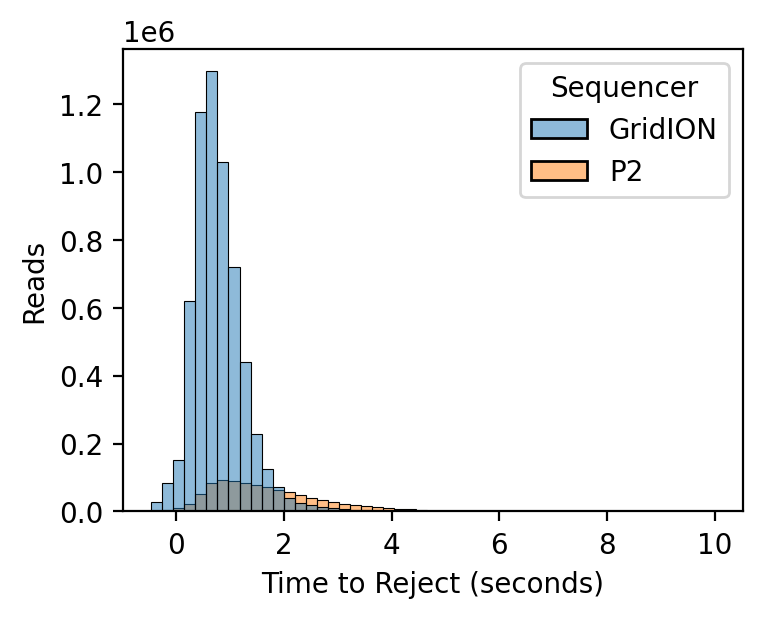

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.histplot(data=df[df['sequencing_time'] < 10], 
             x='sequencing_time',
             hue='Sequencer',
             bins=51)

plt.ylabel("Reads")
plt.xlabel("Time to Reject (seconds)")

In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/data/adaptive_sampling/sixth_AS_test_03142024/sequencing_summary_PAS55331_9357e86a_2ea89025.txt"
summary = pd.read_csv(fpath, sep='\t')

print(f"{summary.shape=}")
print(summary.columns)
print()
summary.head()

# load the AS summary as well
fpath = "/nfs/turbo/umms-indikar/shared/projects/HSC/data/adaptive_sampling/sixth_AS_test_03142024/other_reports/adaptive_sampling_PAS55331_9357e86a_2ea89025.csv"
asdf = pd.read_csv(fpath)
print(f"{asdf.shape=}")
print(asdf.columns)
print()
asdf.head()

In [ ]:
summary[['read_id']].head()

In [ ]:
rejected_ids = asdf[asdf['decision'] == 'unblock']['read_id'].values

pdf = summary[summary['read_id'].isin(rejected_ids)]
print(f"{pdf.shape=}")
pdf.head()

In [ ]:
sns.histplot(data=pdf[pdf['duration'] < 10], 
             x='duration',
             bins=31)

# plt.yscale('log')